In [1]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer

In [2]:
data = pd.read_json("recipies.json")

s = data['ingredients']

mlb = MultiLabelBinarizer()

df_ing = pd.DataFrame(mlb.fit_transform(s),columns=mlb.classes_, index=data.index)

data = pd.concat([data, df_ing], axis = 1)

In [3]:
data.head()

,id,cuisine,ingredients,( oz.) tomato sauce,( oz.) tomato paste,(10 oz.) frozen chopped spinach,"(10 oz.) frozen chopped spinach, thawed and squeezed dry",(14 oz.) sweetened condensed milk,(14.5 oz.) diced tomatoes,(15 oz.) refried beans,...,yukon gold potatoes,yuzu,yuzu juice,za'atar,zest,zesty italian dressing,zinfandel,ziti,zucchini,zucchini blossoms
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,22213,indian,"[water, vegetable oil, wheat, salt]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


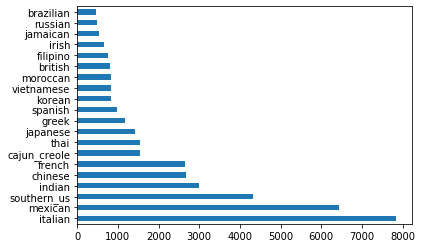

In [4]:
data['cuisine'].value_counts().plot(kind='barh')

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df_ing, data['cuisine'], test_size=0.2, random_state=42,stratify=data['cuisine'])

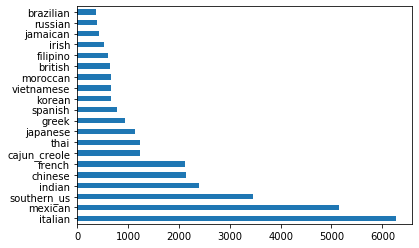

In [7]:
y_train.value_counts().plot(kind='barh')

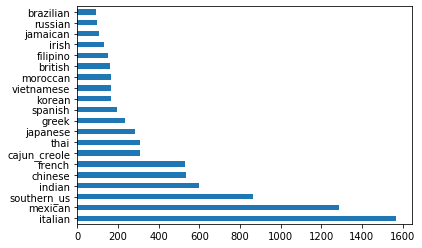

In [8]:
y_test.value_counts().plot(kind='barh')

In [9]:
from sklearn.naive_bayes import GaussianNB, CategoricalNB, BernoulliNB
from sklearn.metrics import accuracy_score

In [10]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [11]:
clf = CategoricalNB()
clf.fit(X_train, y_train)

CategoricalNB(alpha=1.0, class_prior=None, fit_prior=True)

In [12]:
Bclf = BernoulliNB()
Bclf.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [13]:
accuracy_score(y_train, Bclf.predict(X_train))

0.7274584367830541

In [27]:
y_tredTest = clf.predict(X_test)

IndexError: index 1 is out of bounds for axis 1 with size 1

In [32]:
accuracy_score(y_test, Bclf.predict(X_test))

0.6969201759899434

In [37]:
test_accuracy, F1_Score, conf_mx = model_prediction(Bclf, X_train, y_train, X_test, y_test)

NameError: name 'model_prediction' is not defined

In [38]:
from sklearn.metrics import confusion_matrix
conf_mx = confusion_matrix(y_test, Bclf.predict(X_test), normalize = 'true')

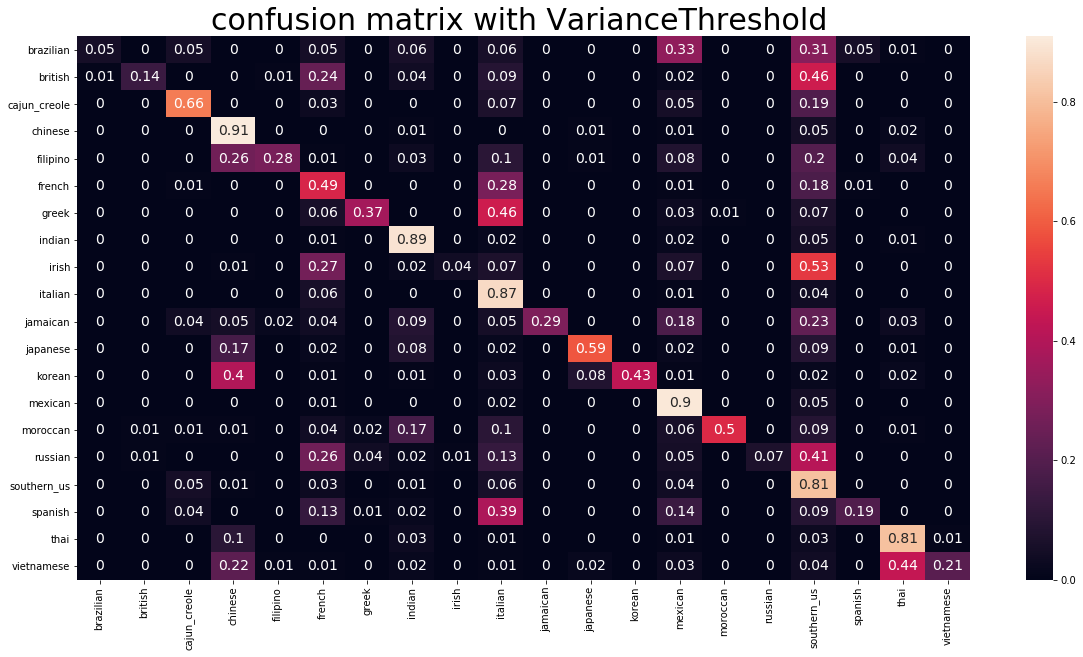

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(conf_mx, labels=None, title=''):
    """Plot of the confusion matrix"""
    plt.figure(figsize=(20, 10))
    conf_mx = conf_mx / conf_mx.sum(axis=1)  # Normalization
    cm_df = pd.DataFrame(conf_mx, index=[i for i in labels], columns=[
                         i for i in labels])
    sns.heatmap(round(cm_df, 2), annot=True, annot_kws={"size": 14})
    plt.title(title, fontsize=30)

plot_confusion_matrix(conf_mx, labels = np.unique(y_test), title = 'confusion matrix with VarianceThreshold ')

In [44]:
conf_mx_acc = conf_mx.diagonal()

In [45]:
print(conf_mx_acc)

[0.05376344 0.13664596 0.65695793 0.90654206 0.2781457  0.49338374
 0.36595745 0.88685524 0.03759398 0.86734694 0.28571429 0.5915493
 0.42771084 0.90450311 0.5        0.07142857 0.80555556 0.19191919
 0.81168831 0.21212121]


In [53]:
c = data['cuisine'].value_counts().sort_index(ascending=True)
print(c)

brazilian        467
british          804
cajun_creole    1546
chinese         2673
filipino         755
french          2646
greek           1175
indian          3003
irish            667
italian         7838
jamaican         526
japanese        1423
korean           830
mexican         6438
moroccan         821
russian          489
southern_us     4320
spanish          989
thai            1539
vietnamese       825
Name: cuisine, dtype: int64


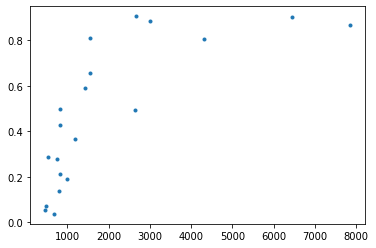

In [54]:
plt.plot(c, conf_mx_acc,'.')